In [1]:
#! pip install -U textblob
#! python -m textblob.download_corpora

In [2]:
import pandas as pd
import re 
import seaborn as sns
import numpy as np
from textblob import TextBlob

In [3]:
tw_clean = pd.read_csv("tw_data_short.csv")
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567526 entries, 0 to 567525
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            567526 non-null  object 
 1   time            567526 non-null  object 
 2   date_final      567526 non-null  object 
 3   tweet           567526 non-null  object 
 4   mentions        567526 non-null  object 
 5   replies_count   567526 non-null  float64
 6   retweets_count  567526 non-null  float64
 7   likes_count     567526 non-null  float64
 8   hashtags        567526 non-null  object 
dtypes: float64(3), object(6)
memory usage: 39.0+ MB


In [4]:
tw_tokens = pd.read_csv("tweets_token.csv")
tw_tokens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567526 entries, 0 to 567525
Columns: 198 entries, Unnamed: 0 to gt
dtypes: int64(198)
memory usage: 857.3 MB


In [5]:
all_data_token = tw_clean.join(tw_tokens, how='left', lsuffix='l', rsuffix='r', sort=False )
all_data_token["date"] = pd.to_datetime(all_data_token["date"])
all_data_token["timel"] = pd.to_datetime(all_data_token["timel"], format= '%H:%M:%S' ).dt.time
all_data_token["date_final"] = pd.to_datetime(all_data_token["date_final"])
all_data_token.rename(columns={"date_final": "time"}, inplace=True)
all_data_token

,date,timel,time,tweetl,mentions,replies_count,retweets_count,likes_count,hashtags,Unnamed: 0,...,giving,cap,l,usdt,year,atom,luna,ladybug,already,gt
0,2021-04-28,16:59:39,2021-04-28 16:59:39,Checking doge coin seeing if ur rich yet 👀,[],1.0,1.0,8.0,[],0,...,0,0,0,0,0,0,0,0,0,0
1,2021-04-28,16:59:31,2021-04-28 16:59:31,Your so doge,[],2.0,3.0,7.0,[],1,...,0,0,0,0,0,0,0,0,0,0
2,2021-04-28,16:59:24,2021-04-28 16:59:24,#DOGE Move Right Now 🐕💹🚀 Follow The best Chan...,[],31.0,18.0,175.0,"['doge', 'telegram']",2,...,0,0,0,0,0,0,0,0,0,0
3,2021-04-28,16:59:12,2021-04-28 16:59:12,@Seeker_Good 1000x for all dogseason coins $s...,[],0.0,1.0,1.0,[],3,...,0,0,0,0,0,0,0,0,0,0
4,2021-04-28,16:59:04,2021-04-28 16:59:04,"Oh and by the way, we've just burned over 2897...",[],74.0,179.0,342.0,"['memecoin', 'solana', 'solsummer', 'solszn', ...",4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567521,2021-01-01,16:15:57,2021-01-01 16:15:57,#doge EVERYONE DIMP $20 to #dogecoin tonight!!...,"[{'screen_name': 'elonmusk', 'name': 'elon mus...",0.0,4.0,10.0,"['doge', 'dogecoin']",567521,...,0,0,0,0,0,0,0,0,0,0
567522,2021-01-01,16:15:38,2021-01-01 16:15:38,1 DOGE Price: 0.00000016 BTC #doge #dogecoin 2...,[],0.0,1.0,1.0,"['doge', 'dogecoin']",567522,...,0,0,0,0,0,0,0,0,0,0
567523,2021-01-01,16:09:03,2021-01-01 16:09:03,"@Flak And to celebrate, have some Doge Caek! ...",[],1.0,1.0,12.0,[],567523,...,0,0,0,0,0,0,0,0,0,0
567524,2021-01-01,16:00:29,2021-01-01 16:00:29,@dogecoin Pump it doge.not only in mere words....,[],2.0,2.0,22.0,[],567524,...,0,0,0,0,0,0,0,0,0,0


In [6]:
subj = []
polar = []
for i in range(0, len(all_data_token["tweetl"])):
    testimonial = TextBlob(all_data_token["tweetl"][i])
    subj.append(testimonial.sentiment.subjectivity)
    polar.append(testimonial.sentiment.polarity)
all_data_token["subj"] = subj
all_data_token["polar"] = polar

In [7]:
all_data_token

,date,timel,time,tweetl,mentions,replies_count,retweets_count,likes_count,hashtags,Unnamed: 0,...,l,usdt,year,atom,luna,ladybug,already,gt,subj,polar
0,2021-04-28,16:59:39,2021-04-28 16:59:39,Checking doge coin seeing if ur rich yet 👀,[],1.0,1.0,8.0,[],0,...,0,0,0,0,0,0,0,0,0.750000,0.375000
1,2021-04-28,16:59:31,2021-04-28 16:59:31,Your so doge,[],2.0,3.0,7.0,[],1,...,0,0,0,0,0,0,0,0,0.000000,0.000000
2,2021-04-28,16:59:24,2021-04-28 16:59:24,#DOGE Move Right Now 🐕💹🚀 Follow The best Chan...,[],31.0,18.0,175.0,"['doge', 'telegram']",2,...,0,0,0,0,0,0,0,0,0.708929,0.321429
3,2021-04-28,16:59:12,2021-04-28 16:59:12,@Seeker_Good 1000x for all dogseason coins $s...,[],0.0,1.0,1.0,[],3,...,0,0,0,0,0,0,0,0,0.000000,0.000000
4,2021-04-28,16:59:04,2021-04-28 16:59:04,"Oh and by the way, we've just burned over 2897...",[],74.0,179.0,342.0,"['memecoin', 'solana', 'solsummer', 'solszn', ...",4,...,0,0,0,0,0,0,0,0,0.100000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567521,2021-01-01,16:15:57,2021-01-01 16:15:57,#doge EVERYONE DIMP $20 to #dogecoin tonight!!...,"[{'screen_name': 'elonmusk', 'name': 'elon mus...",0.0,4.0,10.0,"['doge', 'dogecoin']",567521,...,0,0,0,0,0,0,0,0,0.000000,0.000000
567522,2021-01-01,16:15:38,2021-01-01 16:15:38,1 DOGE Price: 0.00000016 BTC #doge #dogecoin 2...,[],0.0,1.0,1.0,"['doge', 'dogecoin']",567522,...,0,0,0,0,0,0,0,0,0.000000,0.000000
567523,2021-01-01,16:09:03,2021-01-01 16:09:03,"@Flak And to celebrate, have some Doge Caek! ...",[],1.0,1.0,12.0,[],567523,...,0,0,0,0,0,0,0,0,0.000000,0.000000
567524,2021-01-01,16:00:29,2021-01-01 16:00:29,@dogecoin Pump it doge.not only in mere words....,[],2.0,2.0,22.0,[],567524,...,0,0,0,0,0,0,0,0,0.750000,-0.250000


In [8]:
testimonial = TextBlob(all_data_token["tweetl"][27])
testimonial.sentiment.subjectivity
testimonial.sentiment.polarity

0.21770833333333334

<AxesSubplot:ylabel='Frequency'>

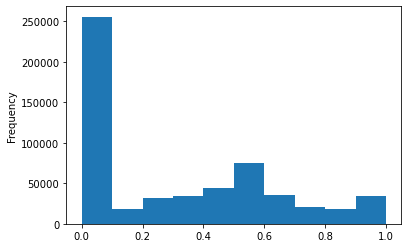

In [9]:
all_data_token.subj.plot( kind = "hist")

<AxesSubplot:ylabel='Frequency'>

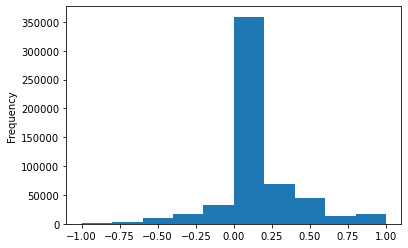

In [10]:
all_data_token.polar.plot( kind = "hist")

In [11]:
all_data_token.drop(labels = ["hashtags", "Unnamed: 0"], axis=1, inplace=True)

In [12]:
#Adding col with 0 1 values, wich mean more or less 100 likes
all_data_token.insert(7,'top_tw', '')
all_data_token['top_tw'] = pd.DataFrame(np.where(all_data_token['likes_count']>100, '1', '0'))
all_data_token['top_tw'].value_counts()

0    545461
1     22065
Name: top_tw, dtype: int64

In [13]:
all_data_token["top_tw"] = all_data_token["top_tw"].apply(pd.to_numeric)

In [14]:
all_data_token.head()

,date,timel,time,tweetl,mentions,replies_count,retweets_count,top_tw,likes_count,dogecoin,...,l,usdt,year,atom,luna,ladybug,already,gt,subj,polar
0,2021-04-28,16:59:39,2021-04-28 16:59:39,Checking doge coin seeing if ur rich yet 👀,[],1.0,1.0,0,8.0,0,...,0,0,0,0,0,0,0,0,0.750000,0.375000
1,2021-04-28,16:59:31,2021-04-28 16:59:31,Your so doge,[],2.0,3.0,0,7.0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
2,2021-04-28,16:59:24,2021-04-28 16:59:24,#DOGE Move Right Now 🐕💹🚀 Follow The best Chan...,[],31.0,18.0,1,175.0,0,...,0,0,0,0,0,0,0,0,0.708929,0.321429
3,2021-04-28,16:59:12,2021-04-28 16:59:12,@Seeker_Good 1000x for all dogseason coins $s...,[],0.0,1.0,0,1.0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
4,2021-04-28,16:59:04,2021-04-28 16:59:04,"Oh and by the way, we've just burned over 2897...",[],74.0,179.0,1,342.0,0,...,0,0,0,0,0,0,0,0,0.100000,0.300000


In [15]:
#splitting to popular and unpopular tweets
top_tw = all_data_token[all_data_token['top_tw'] == 1]
low_tw = all_data_token[all_data_token['top_tw'] == 0]
top_tw.head()

,date,timel,time,tweetl,mentions,replies_count,retweets_count,top_tw,likes_count,dogecoin,...,l,usdt,year,atom,luna,ladybug,already,gt,subj,polar
2,2021-04-28,16:59:24,2021-04-28 16:59:24,#DOGE Move Right Now 🐕💹🚀 Follow The best Chan...,[],31.0,18.0,1,175.0,0,...,0,0,0,0,0,0,0,0,0.708929,0.321429
4,2021-04-28,16:59:04,2021-04-28 16:59:04,"Oh and by the way, we've just burned over 2897...",[],74.0,179.0,1,342.0,0,...,0,0,0,0,0,0,0,0,0.100000,0.300000
45,2021-04-28,16:50:40,2021-04-28 16:50:40,$doge up https://t.co/kHqFhSZxG4,[],67.0,588.0,1,4785.0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
64,2021-04-28,16:47:22,2021-04-28 16:47:22,my targets for end bullmarket: $ETH 5500-7700...,[],93.0,77.0,1,530.0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
73,2021-04-28,16:45:15,2021-04-28 16:45:15,Want to stay up to date on DOGE? Consider subs...,[],7.0,43.0,1,174.0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000


In [16]:
all_data_token.columns

Index(['date', 'timel', 'time', 'tweetl', 'mentions', 'replies_count',
       'retweets_count', 'top_tw', 'likes_count', 'dogecoin',
       ...
       'l', 'usdt', 'year', 'atom', 'luna', 'ladybug', 'already', 'gt', 'subj',
       'polar'],
      dtype='object', length=208)

In [17]:
cols_to_mean = ['subj', 'polar']
dict_cols = {i : "sum" if i not in cols_to_mean else "mean" for i in all_data_token.columns[3: 405]}
dict_cols

{'tweetl': 'sum',
 'mentions': 'sum',
 'replies_count': 'sum',
 'retweets_count': 'sum',
 'top_tw': 'sum',
 'likes_count': 'sum',
 'dogecoin': 'sum',
 'dogearmy': 'sum',
 'elonmusk': 'sum',
 'buy': 'sum',
 'dogecointothemoon': 'sum',
 'btc': 'sum',
 'crypto': 'sum',
 'dogecoinrise': 'sum',
 'dogecoinarmy': 'sum',
 'eth': 'sum',
 'get': 'sum',
 'bitcoin': 'sum',
 'moon': 'sum',
 'dollar': 'sum',
 'coin': 'sum',
 'one': 'sum',
 'like': 'sum',
 'xrp': 'sum',
 'let': 'sum',
 'go': 'sum',
 'hold': 'sum',
 'k': 'sum',
 'people': 'sum',
 'dogecoins': 'sum',
 'going': 'sum',
 'cryptocurrency': 'sum',
 'dogecointo': 'sum',
 'dogetothemoon': 'sum',
 'price': 'sum',
 'dogeday': 'sum',
 'ada': 'sum',
 'today': 'sum',
 'dogecointoadollar': 'sum',
 'timer': 'sum',
 'bnb': 'sum',
 'link': 'sum',
 'amp': 'sum',
 'hodl': 'sum',
 'make': 'sum',
 'last': 'sum',
 'day': 'sum',
 'pump': 'sum',
 'sell': 'sum',
 'money': 'sum',
 'see': 'sum',
 'elon': 'sum',
 'new': 'sum',
 'retweet': 'sum',
 'ltc': 'sum',
 

In [18]:
#grouping by date and hour
top_tw_agg = top_tw.groupby([top_tw['time'].dt.date, top_tw['time'].dt.hour]).agg(dict_cols)
low_tw_agg = low_tw.groupby([low_tw['time'].dt.date, low_tw['time'].dt.hour]).agg(dict_cols)

In [19]:
top_tw_agg

tweetl  \
time       time                                                      
2021-01-01 9     $doge who's in DOGE for the long-term?  https:...   
           10    $DOGE  I've said it before, I'll say it again....   
           11    Ever since @elonmusk took over $DOGE, it’s bee...   
           12    I love you doge. #ToTheMoon #doge #dogecoin  h...   
           13                         Bought $5K worth Yolo! $DOGE   
...                                                            ...   
2021-04-28 19    #Doge is the only canine-inspired cryptocurren...   
           20    $DOGE will always surprise you! #dogecoinSEC: ...   
           21    $EGOD Token Giveaway 🎉  💰 Prize: 69 $EGOD TOKE...   
           22    @mcuban Mark, it’s clear you understand #Dogec...   
           23    🚀🌚Don’t be a pussy! HOLD! 🐕Much Wow 💎🙌🏻💎#DOGE ...   

                                                          mentions  \
time       time                                                      
2021-01-01 9                                                  [][]   
           10                                                   []   
           11    [{'screen_name': 'elonmusk', 'name': 'elon mus...   
           12    [][][{'screen_name': 'elonmusk', 'name': 'elon...   
           13                                                   []   
...                                                            ...   
2021-04-28 19    [][][][][][][{'screen_name': 'elonmusk', 'name...   
           20                                           [][][][][]   
           21    [{'screen_name': 'egodthemoon', 'name': 'egod ...   
           22                                           [][][][][]   
           23    [][][][][][{'screen_name': 'elonmusk', 'name':...   

                 replies_count  retweets_count  top_tw  likes_count  dogecoin  \
time       time                                                                 
2021-01-01 9              82.0            72.0       2        562.0         2   
           10              8.0            15.0       1        111.0         0   
           11             29.0            39.0       1        281.0         0   
           12             64.0           146.0       4       1417.0         1   
           13             14.0            23.0       1        166.0         0   
...                        ...             ...     ...          ...       ...   
2021-04-28 19             78.0           431.0       7       2989.0         3   
           20            499.0           766.0       5       1751.0         1   
           21             57.0           316.0       3        871.0         0   
           22           1174.0          2506.0       5      11779.0         1   
           23           1471.0          4502.0      40      26748.0         4   

                 dogearmy  elonmusk  buy  ...  l  usdt  year  atom  luna  \
time       time                           ...                              
2021-01-01 9            0         0    0  ...  0     0     0     0     0   
           10           0         0    1  ...  0     0     1     0     0   
           11           0         1    0  ...  0     0     0     0     0   
           12           0         1    0  ...  0     0     0     0     0   
           13           0         0    0  ...  0     0     0     0     0   
...                   ...       ...  ...  ... ..   ...   ...   ...   ...   
2021-04-28 19           1         1    0  ...  0     0     0     0     0   
           20           0         0    0  ...  0     0     0     0     0   
           21           0         0    0  ...  0     0     0     0     0   
           22           0         0    2  ...  0     0     0     0     0   
           23           3        19    3  ...  0     0     0     0     0   

                 ladybug  already  gt      subj     polar  
time       time                                            
2021-01-01 9           0        0   0  0.300000  0.350000  
           10  

In [20]:
data_prices = pd.read_csv("data/dataprices01.csv")

In [21]:
data_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16875 entries, 0 to 16874
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    16875 non-null  object 
 1   open    16875 non-null  float64
 2   high    16875 non-null  float64
 3   low     16875 non-null  float64
 4   Volume  16875 non-null  float64
 5   tv      16875 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 791.1+ KB


In [25]:
data_prices['time'] = pd.to_datetime(data_prices['time'], utc=True)
data_prices['time'] = pd.to_datetime(data_prices['time']).dt.tz_convert('Us/Mountain')
data_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16875 entries, 0 to 16874
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                      
---  ------  --------------  -----                      
 0   time    16875 non-null  datetime64[ns, US/Mountain]
 1   open    16875 non-null  float64                    
 2   high    16875 non-null  float64                    
 3   low     16875 non-null  float64                    
 4   Volume  16875 non-null  float64                    
 5   tv      16875 non-null  int64                      
dtypes: datetime64[ns, US/Mountain](1), float64(4), int64(1)
memory usage: 791.1 KB


In [27]:
data_prices = data_prices.loc[(data_prices["time"] > "2021-01-02 00:00:00") & (data_prices["time"] < "2021-04-29 01:00:00")]

In [28]:
data_prices

,time,open,high,low,Volume,tv
32,2021-01-02 01:00:00-07:00,0.006921,0.007172,0.006709,29383228.0,-1
33,2021-01-02 02:00:00-07:00,0.006767,0.007038,0.006641,41415520.0,0
34,2021-01-02 03:00:00-07:00,0.006780,0.007179,0.006745,31058927.0,1
35,2021-01-02 04:00:00-07:00,0.007065,0.007421,0.007055,31100758.0,1
36,2021-01-02 05:00:00-07:00,0.007308,0.007315,0.006738,57350444.0,-1
...,...,...,...,...,...,...
2826,2021-04-28 20:00:00-06:00,0.317420,0.322030,0.314180,22698952.2,1
2827,2021-04-28 21:00:00-06:00,0.318320,0.325380,0.317000,22205970.7,1
2828,2021-04-28 22:00:00-06:00,0.322610,0.322640,0.312610,23157805.9,-1
2829,2021-04-28 23:00:00-06:00,0.314450,0.317830,0.312520,15291654.6,0


In [29]:
data_prices = data_prices.groupby([data_prices['time'].dt.date, data_prices['time'].dt.hour]).agg({"open": "sum", "high": "sum", "low": "sum", "tv": "sum", "Volume": "sum"})


In [30]:
pd.DataFrame(data_prices)

open      high       low  tv      Volume
time       time                                              
2021-01-02 1     0.006921  0.007172  0.006709  -1  29383228.0
           2     0.006767  0.007038  0.006641   0  41415520.0
           3     0.006780  0.007179  0.006745   1  31058927.0
           4     0.007065  0.007421  0.007055   1  31100758.0
           5     0.007308  0.007315  0.006738  -1  57350444.0
...                   ...       ...       ...  ..         ...
2021-04-28 20    0.317420  0.322030  0.314180   1  22698952.2
           21    0.318320  0.325380  0.317000   1  22205970.7
           22    0.322610  0.322640  0.312610  -1  23157805.9
           23    0.314450  0.317830  0.312520   0  15291654.6
2021-04-29 0     0.314240  0.317220  0.312000  -1  16013958.7

[2799 rows x 5 columns]

In [31]:
data_prices.describe()

,open,high,low,tv,Volume
count,2799.000000,2799.000000,2799.000000,2799.000000,2.799000e+03
mean,0.073376,0.075317,0.071578,-0.001072,2.654948e+07
std,0.083929,0.087130,0.080891,0.933262,5.703879e+07
min,0.006767,0.007038,0.006641,-1.000000,9.028900e+04
25%,0.032794,0.033759,0.031802,-1.000000,3.229348e+06
50%,0.054537,0.055162,0.054140,0.000000,7.738059e+06
75%,0.060973,0.061724,0.060018,1.000000,2.447391e+07
max,0.425267,0.480000,0.404310,1.000000,9.334161e+08


In [32]:
#merging data with pricess
tokens_m = top_tw_agg.merge(low_tw_agg, how = "outer",suffixes=('_t', '_l'), left_index = True, right_index = True)


In [33]:
tokens_m.head()

tweetl_t mentions_t  replies_count_t  retweets_count_t  \
time       time                                                          
2021-01-01 0         NaN        NaN              NaN               NaN   
           1         NaN        NaN              NaN               NaN   
           2         NaN        NaN              NaN               NaN   
           3         NaN        NaN              NaN               NaN   
           4         NaN        NaN              NaN               NaN   

                 top_tw_t  likes_count_t  dogecoin_t  dogearmy_t  elonmusk_t  \
time       time                                                                
2021-01-01 0          NaN            NaN         NaN         NaN         NaN   
           1          NaN            NaN         NaN         NaN         NaN   
           2          NaN            NaN         NaN         NaN         NaN   
           3          NaN            NaN         NaN         NaN         NaN   
           4          NaN            NaN         NaN         NaN         NaN   

                 buy_t  ...  l_l  usdt_l  year_l  atom_l  luna_l  ladybug_l  \
time       time         ...                                                   
2021-01-01 0       NaN  ...    0       0       0       0       0          0   
           1       NaN  ...    0       0       3       0       0          0   
           2       NaN  ...    0       3       0       0       0          0   
           3       NaN  ...    0       1       0       0       0          0   
           4       NaN  ...    0       0       2       1       0          0   

                 already_l  gt_l    subj_l   polar_l  
time       time                                       
2021-01-01 0             0     0  0.408333  0.094643  
           1             0     0  0.651512  0.220910  
           2             0     0  0.491422  0.255571  
           3             0     0  0.454293  0.242434  
           4             0     0  0.416278  0.203159  

[5 rows x 410 columns]

In [34]:
#merging data with pricess
all_data_m = tokens_m.merge(data_prices, how = "inner", left_index = True, right_index = True)
all_data_m.fillna(0, inplace=True)

In [35]:
all_data_m.to_csv("data/all_data_m.csv")

In [36]:
all_data_m.tweetl_t[5]

'@StickmanSham @RANK10YGO &gt;Crack a Silly “Hm that was not very silly, silly man. Quite unsilly indeed. Let’s see if death makes you funny”  &gt;Doge Attacksbuy and hold dogecoin should be 3 in marketcap it deserves it #dogecoin &gt; #xrp #doge=1$  https://t.co/pmpiZdqtLfPRICE ACTION:   - Over $100m of shorts liquidated as $BTC breaks $31k  - $ETH holds its ground above $750  - $DOGE leading altcoin gains at +42% on the day  - $XRP continues to struggle over legal battles'